# Bagging Classifier

Predict whether a customer will buy a product based on demographic and behavioral features.

Steps:
- Prepare the dataset.
- Use BaggingClassifier with Decision Trees as the base model.
- Evaluate performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples= 1000, n_features= 5, n_informative= 3, n_redundant= 0, n_classes=2, random_state= 42)

# Spliting the Data Sets into Train and Test Models

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Introducing the Classifier 

In [15]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  
    n_estimators=10,                          
    max_samples=0.8,                          
    random_state=42
)

# Training The Model

In [16]:
bagging_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  random_state=42)

# Predict the Model

In [17]:
y_pred=bagging_clf.predict(x_test)

# Taking out the Prints

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9433333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       138
           1       0.97      0.93      0.95       162

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


Confusion Matrix:
 [[133   5]
 [ 12 150]]


# Visualizing the Model Outputs

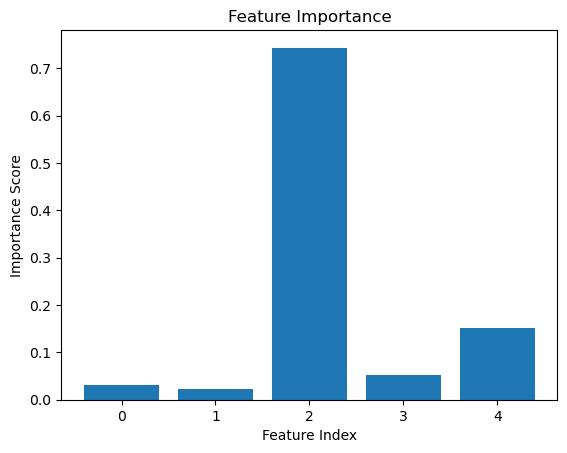

In [19]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_clf.estimators_
], axis=0)

import matplotlib.pyplot as plt
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()